# OpenEO Connection to EURAC Backend

In [2]:
import openeo
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
# Define constants

# Connection
EURAC_DRIVER_URL = "http://saocompute.eurac.edu/openEO_WCPS_Driver/openeo"
OUTPUT_FILE = "/tmp/openeo-wcps.nc"
OUTFORMAT = "netcdf"

# Data
PRODUCT_ID = "S2_L2A_T32TPS_20M"

DATE_START = "2017-01-01"
DATE_END = "2017-01-31"

IMAGE_LEFT = 652000
IMAGE_RIGHT = 672000
IMAGE_TOP = 5161000
IMAGE_BOTTOM = 5181000
IMAGE_SRS = "EPSG:32632"

# Processes
NDVI_RED = "B04"
NDVI_NIR = "B8A"


In [4]:
# Connect with EURAC backend
session = openeo.session("nobody", EURAC_DRIVER_URL)
session

In [5]:
# Retrieve the list of available collections
collections = session.imagecollections()

list(collections)[:5]

[{'product_id': 's1a_t117_epsg3035_20m_VV'},
 {'product_id': 'S2_L2A_T32TQS_10M'},
 {'product_id': 'S2_L2A_T32TQS_20M'},
 {'product_id': 'S2_L2A_T32TPT_20M'},
 {'product_id': 'S2A_L2A_NDVI_T32TPS'}]

In [6]:
# Select collection product
s2_fapar = session.image(PRODUCT_ID)

s2_fapar

In [7]:
# Specifying the date range and the bounding box
download = s2_fapar \
    .bbox_filter(left=IMAGE_LEFT, right=IMAGE_RIGHT, top=IMAGE_TOP, bottom=IMAGE_BOTTOM,srs=IMAGE_SRS) \
    .date_range_filter(DATE_START, DATE_END) \
    .ndvi(NDVI_RED, NDVI_NIR) \
    .max_time() \
    .download(OUTPUT_FILE,format=OUTFORMAT)
    
download

odict_keys(['B8A', 'E', 'N'])
<class 'netCDF4._netCDF4.Variable'>
float64 B8A(E, N)
    missing_value: NaN
    units: 10^0
unlimited dimensions: 
current shape = (1000, 1000)
filling off



/data/.pyenv/versions/miniconda3-latest/envs/openeo-client/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  


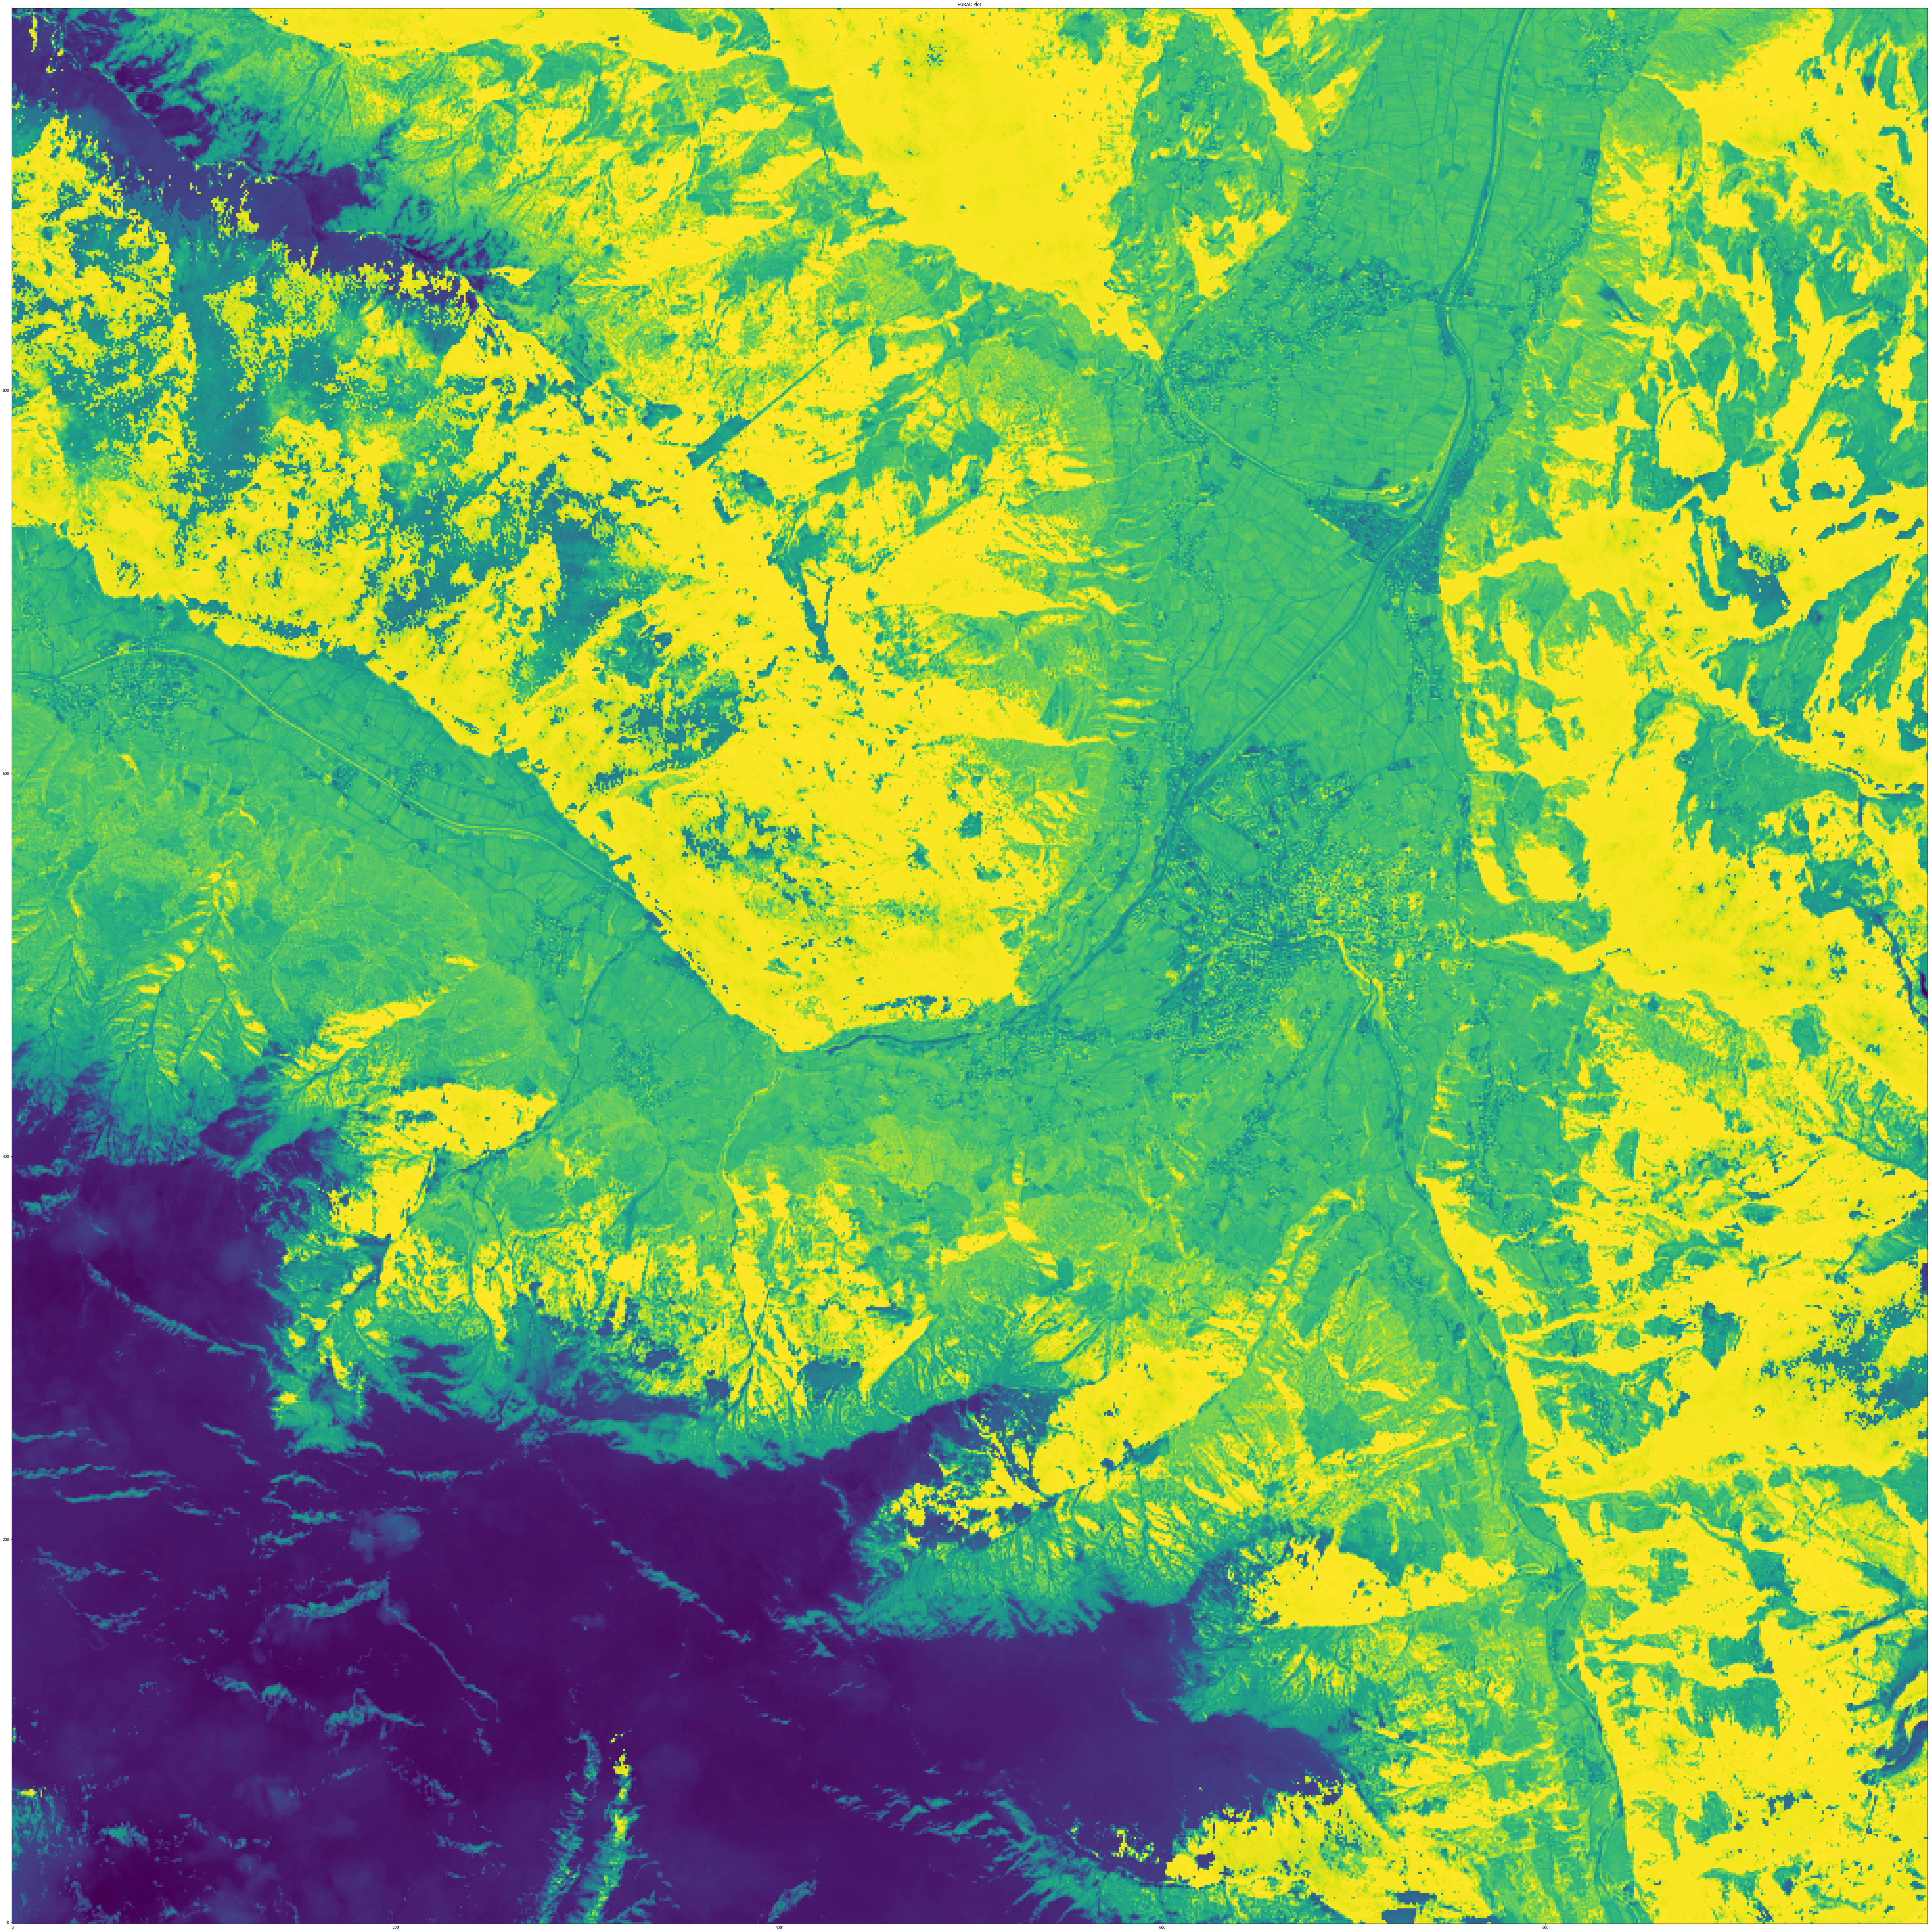

In [14]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np

# open a local NetCDF file or remote OPeNDAP URL
url = '/tmp/openeo-wcps.nc'
nc = netCDF4.Dataset(url)

# examine the variables
print (nc.variables.keys())
print (nc.variables['B8A'])

# sample every 10th point of the 'B8A' variable
topo = nc.variables['B8A'][::1,::1]
topo = np.flipud(np.rot90(topo)) 

# make image
plt.figure(figsize=(100,100))
plt.imshow(topo,origin='lower') 
plt.title('EURAC Plot')
plt.savefig('/tmp/image.png', bbox_inches=0)